In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_excel('turbines.xlsx')

In [3]:
# Get needed data, label is RD, and features are Loc and RP
df_data = df[['Offshore','Rated power','Rotor diameter','Minimum hub height','Maximum hub height','Tower weight']]
#df_data = df_data.drop(index=[1510])
df_data.head()

,Offshore,Rated power,Rotor diameter,Minimum hub height,Maximum hub height,Tower weight
0,No,15,10,#ND,#ND,#ND
1,No,20,10,18,30,2.3
2,No,40,15,#ND,#ND,#ND
3,No,60,15,24,40,6
4,No,100,29,27.5,27.5,9.9


In [4]:
drop_list = []
for i in df_data.index:
    for j in [1,2,3,4,5]:
        if df_data.loc[i][j] == '#ND' or type(df_data.loc[i][j]) == str or type(df_data.loc[i][j]) == datetime.datetime:
            if i not in drop_list:
                drop_list.append(i)
len(drop_list)

1247

In [5]:
df_data = df_data.drop(index=drop_list)
df_data['Average hub height'] = (df_data['Minimum hub height']+df_data['Maximum hub height'])/2
df_data['D2h'] = df_data['Rotor diameter']**2 * df_data['Average hub height']
df_data.head()

,Offshore,Rated power,Rotor diameter,Minimum hub height,Maximum hub height,Tower weight,Average hub height,D2h
1,No,20,10,18,30,2.3,24,2400
3,No,60,15,24,40,6,32,7200
4,No,100,29,27.5,27.5,9.9,27.5,23127.5
5,No,100,23,43,43,14,43,22747
6,No,100,30,24,30,9.7,27,24300


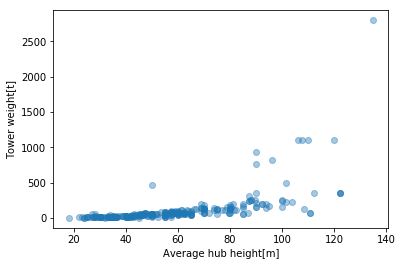

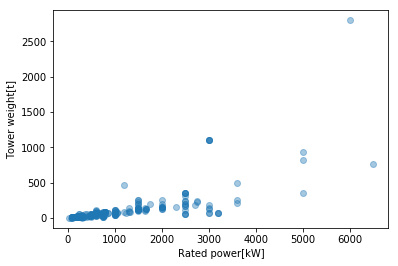

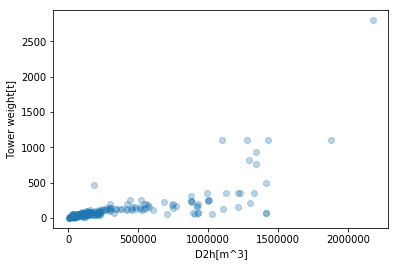

In [6]:
# a general plot to see the relationship
plt.scatter(df_data['Average hub height'],df_data['Tower weight'],alpha=0.4)
plt.xlabel('Average hub height[m]')
plt.ylabel('Tower weight[t]')
plt.show()

plt.scatter(df_data['Rated power'],df_data['Tower weight'],alpha=0.4)
plt.xlabel('Rated power[kW]')
plt.ylabel('Tower weight[t]')
plt.show()

plt.scatter(df_data['D2h'],df_data['Tower weight'],alpha=0.3)
plt.xlabel('D2h[m^3]')
plt.ylabel('Tower weight[t]')
plt.show()

In [7]:
# change the loc of wind turbine to numeric values, where 1 means offshore and 0 means onshore
offshore = []
for i in df_data.index:
    if df_data.loc[i][0] == 'Yes':
        offshore.append(1)
    if df_data.loc[i][0] == 'No':
        offshore.append(0)
len(offshore)    

264

In [8]:
df_data['Offshore'] = offshore
df_data['bias'] = np.ravel(np.ones((df_data.shape[0],1))) # adding bias
df_data.head()

,Offshore,Rated power,Rotor diameter,Minimum hub height,Maximum hub height,Tower weight,Average hub height,D2h,bias
1,0,20,10,18,30,2.3,24,2400,1.0
3,0,60,15,24,40,6,32,7200,1.0
4,0,100,29,27.5,27.5,9.9,27.5,23127.5,1.0
5,0,100,23,43,43,14,43,22747,1.0
6,0,100,30,24,30,9.7,27,24300,1.0


In [9]:
df_data['Tower weight'].mean(),df_data['Tower weight'].median()

(113.31098484848485, 56.0)

In [10]:
# deleting the samples with a tower weight greater than 1000t
drop_list = []
for i in df_data.index:
    if df_data.loc[i][5] > 600:
        drop_list.append(i)
len(drop_list)

8

In [11]:
df_data = df_data.drop(index=drop_list)
df_data.head()

,Offshore,Rated power,Rotor diameter,Minimum hub height,Maximum hub height,Tower weight,Average hub height,D2h,bias
1,0,20,10,18,30,2.3,24,2400,1.0
3,0,60,15,24,40,6,32,7200,1.0
4,0,100,29,27.5,27.5,9.9,27.5,23127.5,1.0
5,0,100,23,43,43,14,43,22747,1.0
6,0,100,30,24,30,9.7,27,24300,1.0


In [12]:
df_data.shape

(256, 9)

In [13]:
# outlier detection
from sklearn.ensemble import IsolationForest
X = df_data.values.copy()
x = X[:,[0,1,2,5,6]]
clf = IsolationForest(random_state=0).fit(x)
clf.predict(x)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1,  1

In [14]:
df_new = pd.DataFrame(x,columns=['Offshore','Capacity','Rotor diameter','Tower weight','Hub height'])
df_new.head()

,Offshore,Capacity,Rotor diameter,Tower weight,Hub height
0,0,20,10,2.3,24
1,0,60,15,6,32
2,0,100,29,9.9,27.5
3,0,100,23,14,43
4,0,100,30,9.7,27


In [ ]:
drop_list = []
for index in df_new.index:
    if clf.predict([df_new.loc[index]]) == -1:
        drop_list.append(index)

In [16]:
df_data = df_new.drop(index=drop_list)
df_data.shape

(230, 5)

In [17]:
df_data.head()

,Offshore,Capacity,Rotor diameter,Tower weight,Hub height
1,0,60,15,6,32
2,0,100,29,9.9,27.5
3,0,100,23,14,43
4,0,100,30,9.7,27
5,0,100,25,16,33.5


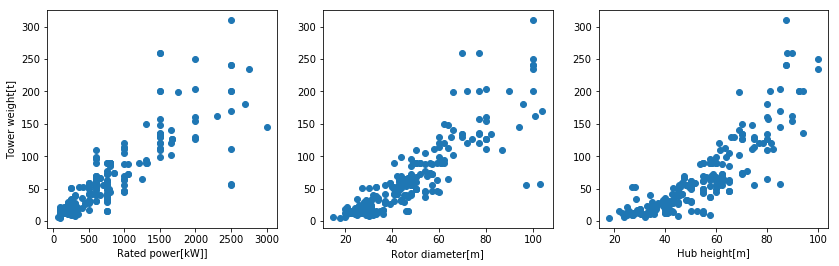

In [18]:
# a general plot to see the relationship
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.scatter(df_data['Capacity'],df_data['Tower weight'])
plt.xlabel('Rated power[kW]]')
plt.ylabel('Tower weight[t]')
plt.subplot(132)
plt.scatter(df_data['Rotor diameter'],df_data['Tower weight'])
plt.xlabel('Rotor diameter[m]')
#plt.ylabel('Tower weight[t]')
plt.subplot(133)
plt.scatter(df_data['Hub height'],df_data['Tower weight'])
plt.xlabel('Hub height[m]')
#plt.ylabel('Tower weight[t]')
plt.savefig('tower_weight.png')
plt.show()

In [19]:
df_data['Tower weight'].mean(),df_data['Tower weight'].median()

(65.5795652173913, 51.5)

In [20]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,4]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [22]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

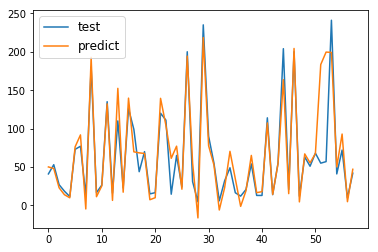

Text(0, 0.5, 'predict')

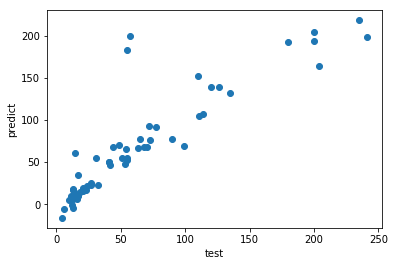

In [23]:
# plot the test dataset with the predicted one
#plt.figure(figsize=(9,6))
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
#plt.ylabel('Rotor diameter[m]',fontsize=12)
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [24]:
from sklearn import metrics

In [25]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

15.763779297237132 880.6959265500608 29.676521469843138


In [26]:
regr.score(x_train, y_train),regr.score(x_test, y_test),regr.coef_

(0.7864578365610708,
 0.7576281631265834,
 array([0.        , 0.02620957, 0.99186578, 1.02398136]))

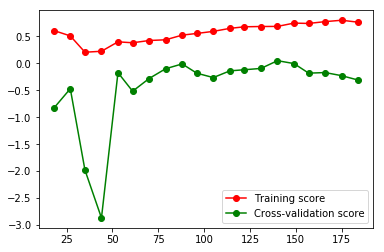

In [27]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

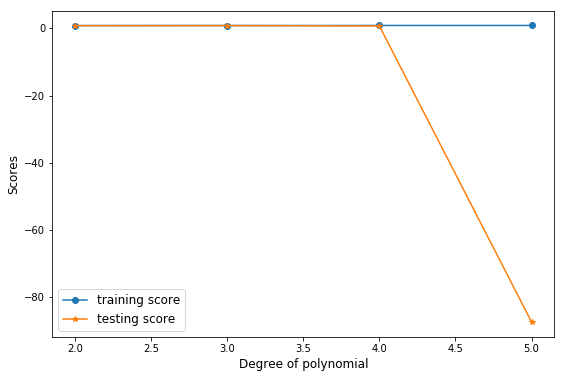

In [28]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
x_p = X[:,[0,1,2,4]]
y_r = X[:,[3]]
train_scores = []
test_scores = []
for i in range(2,6):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.figure(figsize=(9,6))
plt.plot(range(2,6),train_scores,'o-',label = 'training score')
plt.plot(range(2,6),test_scores,'*-',label = 'testing score')
plt.legend(fontsize = 12)
plt.xlabel('Degree of polynomial',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.show()   

In [29]:
train_scores,test_scores

([0.8285553394404715,
  0.836549792177188,
  0.8625540720720295,
  0.8632387233263604],
 [0.8118267921533551,
  0.8364775785729519,
  0.7040725374778453,
  -87.45038100982087])

0.8124626472850941 0.8290107754797184


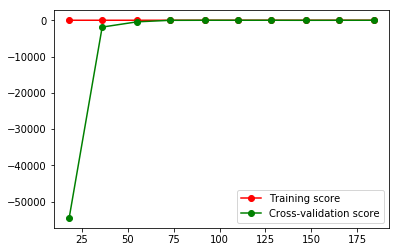

In [30]:
x_p = X[:,[0,1,2,4]]
y_r = X[:,[3]]
poly = PolynomialFeatures(2)
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_train, y_train),regr.score(x_test, y_test))

train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_r, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()


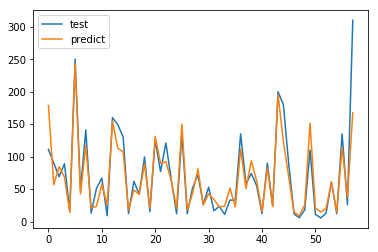

Text(0, 0.5, 'predict')

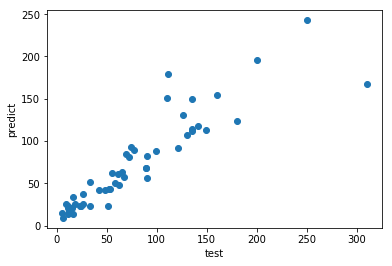

In [31]:
y_pred_LR = regr.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [32]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

15.682892725452467 698.1271370205939 26.422095621290033


In [33]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor

parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

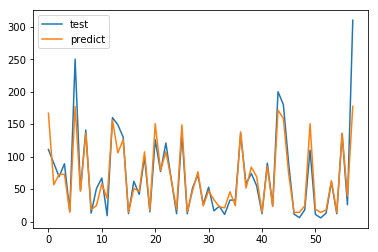

Text(0, 0.5, 'predict')

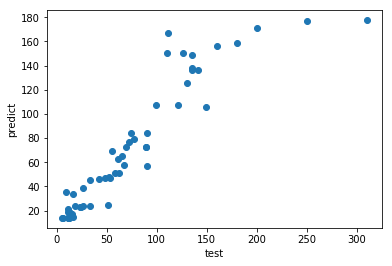

In [34]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [35]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

13.824497733427002 633.684877983575 25.173098299247453


In [36]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.8219341105355888, 0.8447943359728696)

In [37]:
x_3000 = [[0,3000,90,94]]
poly = PolynomialFeatures(2)
x_ = poly.fit_transform(x_3000)
RF_model.predict(x_)

array([177.50488948])

In [40]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=200, gamma=0.1, epsilon=0.1)


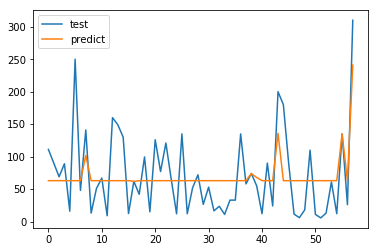

Text(0, 0.5, 'predict')

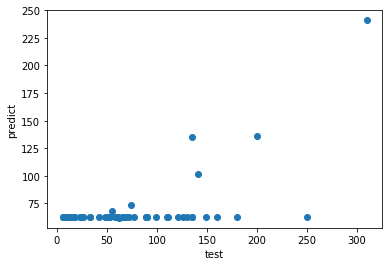

In [41]:
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [42]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

41.88845593149826 2759.1714885341403 52.52781633129384


In [43]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.9923619922846837, 0.32420820202408696)

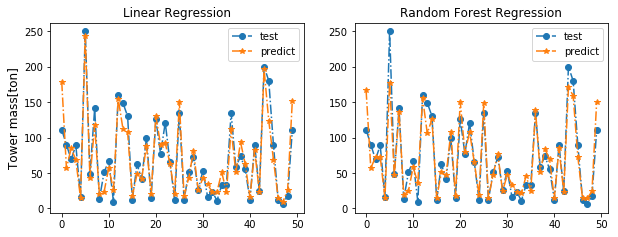

In [45]:
plt.figure(figsize=(10,3.5))

plt.subplot(121)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Tower mass[ton]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(122)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.show()

In [46]:
# feature extraction, adding new features P**0.5 ,log(P) and P**2
df_data['P_sqrt'] = df_data['Capacity']**0.5
df_data['P_log'] = np.log(list(df_data['Capacity']))
df_data['P_square'] = df_data['Capacity']**2
df_data['1/P'] = 1/df_data['Capacity']
df_data['R_sqrt'] = [float(i)**0.5 for i in list(df_data['Rotor diameter'])]
df_data['R_log'] = [np.log(float(i)) for i in list(df_data['Rotor diameter'])]
df_data['R_square'] = [float(i)**2 for i in list(df_data['Rotor diameter'])]
df_data['R/h'] = df_data['Rotor diameter']/df_data['Hub height']
df_data['h/R'] = df_data['Hub height']/df_data['Rotor diameter']
df_data['sqrt_h'] = [float(i)**0.5 for i in list(df_data['Hub height'])]
df_data['exp(R/h)'] = [np.exp(float(i)) for i in list(df_data['R/h'])]
df_data.head()

,Offshore,Capacity,Rotor diameter,Tower weight,Hub height,P_sqrt,P_log,P_square,1/P,R_sqrt,R_log,R_square,R/h,h/R,sqrt_h,exp(R/h)
1,0,60,15,6,32,7.74597,4.094345,3600,0.0166667,3.872983,2.708050,225.0,0.46875,2.13333,5.656854,1.597995
2,0,100,29,9.9,27.5,10,4.605170,10000,0.01,5.385165,3.367296,841.0,1.05455,0.948276,5.244044,2.870670
3,0,100,23,14,43,10,4.605170,10000,0.01,4.795832,3.135494,529.0,0.534884,1.86957,6.557439,1.707250
4,0,100,30,9.7,27,10,4.605170,10000,0.01,5.477226,3.401197,900.0,1.11111,0.9,5.196152,3.037732
5,0,100,25,16,33.5,10,4.605170,10000,0.01,5.000000,3.218876,625.0,0.746269,1.34,5.787918,2.109115


In [47]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.         0.12979762 0.02352677 0.11977174 0.12634432 0.10001015
 0.13705592 0.01776472 0.02443757 0.02720228 0.08771207 0.01529904
 0.00898253 0.17001243 0.01208284]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,1)# using 1 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [15 12 10  7 11  6 14  1  9  2 13  3  4  5  8]


In [49]:
# after feature selection
X = df_data.values.copy()
y = X[:,3]
x = X[:,[1,2,4,5,7,8,10]]
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [50]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

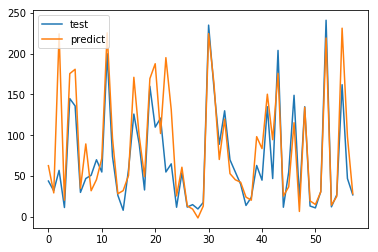

Text(0, 0.5, 'predict')

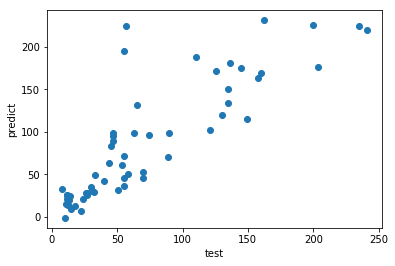

In [51]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [52]:
from sklearn import metrics

In [53]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

23.82043152829721 1492.5891649560435 38.634041530184795


In [54]:
regr.score(x_train, y_train),regr.score(x_test, y_test)

(0.8420027637038751, 0.5941716313191394)

In [55]:
metrics.explained_variance_score(y_test,y_pred_LR)

0.6480374772953466

In [56]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [57]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

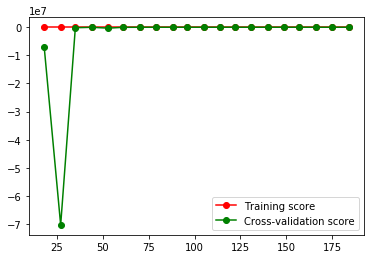

In [58]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [59]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

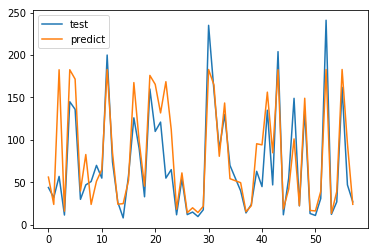

Text(0, 0.5, 'predict')

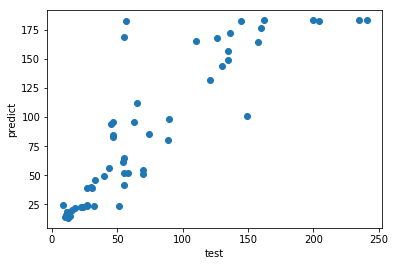

In [60]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [61]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

21.214795903498356 1051.9143407948186 32.43322896035513


In [62]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.8390131460478126, 0.713989159951234)

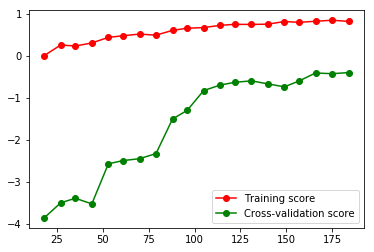

In [63]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [64]:
train_scores_mean

array([1.57593517e-04, 2.52620088e-01, 2.28253440e-01, 3.01677559e-01,
       4.33288231e-01, 4.72306261e-01, 5.11868629e-01, 4.86057484e-01,
       6.00744716e-01, 6.50742952e-01, 6.66294648e-01, 7.19579021e-01,
       7.43510978e-01, 7.41188866e-01, 7.47830308e-01, 8.09714489e-01,
       7.91609169e-01, 8.16093353e-01, 8.40794620e-01, 8.14028184e-01])

In [65]:
test_scores_mean

array([-3.85576209, -3.49658168, -3.38936982, -3.52191675, -2.57050234,
       -2.49333755, -2.44900493, -2.32696006, -1.50556847, -1.30067169,
       -0.8300563 , -0.69878209, -0.63416608, -0.59887874, -0.67084342,
       -0.74122886, -0.60265349, -0.41231934, -0.42946546, -0.40280277])

In [66]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=150, gamma=0.01, epsilon=.1)

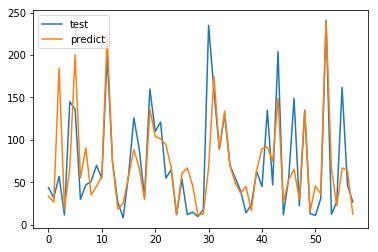

Text(0, 0.5, 'predict')

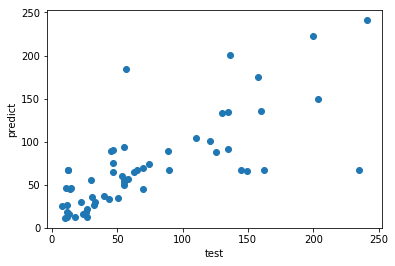

In [67]:
svr_rbf.fit(x_train,y_train)
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [68]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

25.033279535205516 1685.8704442358421 41.05935270113062


In [69]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.9664320373801906, 0.5416193094154891)

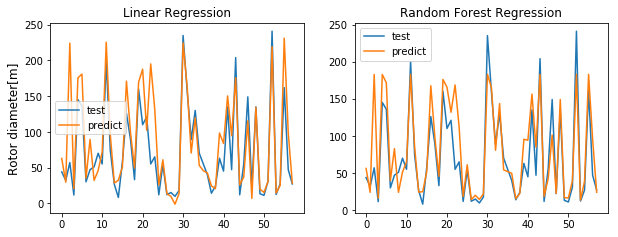

In [72]:
plt.figure(figsize=(10,3.5))

plt.subplot(121)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.ylabel('Rotor diameter[m]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(122)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.show()